In [1]:
from pynq import Overlay
from matplotlib import pyplot as plt
from time import time, sleep


In [2]:
ol = Overlay("TRNG.bit")

In [3]:
TRNG_IP = ol.TRNG_Axi_lite_0

In [4]:
def write_integers_to_file(integers, filename):
    with open(filename, 'w') as f:
        for integer in integers:
            binary_representation = format(integer, '032b')
            f.write(binary_representation + '\n')

In [5]:
init_time = time()
l = []
TRNG_IP.write(0x04, 0x01) # Turn on the ring oscillators
for i in range(50000):
    l.append(TRNG_IP.read(0x00))
TRNG_IP.write(0x04, 0x00) # Turn off the ring oscillators
    
print(f'Total time: {time() - init_time}')

Total time: 0.46063661575317383


In [7]:
write_integers_to_file(l, 'trng_data.e')

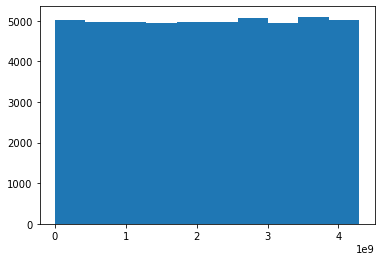

In [6]:
_ = plt.hist(l)

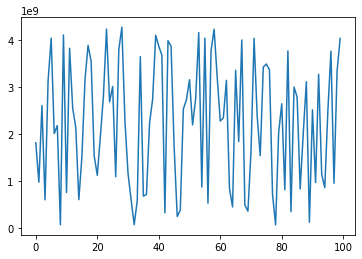

In [17]:
plt.plot(l[:100])